In [1]:
from utils import *

import gensim
from sklearn.mixture import BayesianGaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
from semiSupervisedDnn import selfTrainer

Import model doc2vec model and prepared article data.

In [3]:
model = gensim.models.Word2Vec.load("assets/doc2vecModels/KTH2004_i2000_w10_d500_plainTrain_small_noAuth/KTH2005_i2000_w10_d500_plainTrain_noAuth")
doc_vec = model.docvecs.vectors_docs
doc_tag = list(model.docvecs.doctags.keys())
word_vectors = model.wv.vectors

pickle_o = pickle_obj(); 
id_to_auth = pickle_o.load("assets/dictionaries/id_to_all_auths_2004")
auth_to_id = pickle_o.load("assets/dictionaries/auths_to_all_id_2004")


df_auth = pd.read_csv("assets/dataframes/KT_auth_2004")
df_abs = pd.read_csv("assets/dataframes/all_authors_df_2004")

Prepare tags (i.e., article doc-id) and vector representation of these articles.

In [1]:
for d in doc_tag[:5]:
    print(d[:2])

NameError: name 'doc_tag' is not defined

In [4]:
article_tag = [t for t in doc_tag if not t[0].islower()]
all_vec = model[article_tag]
tags =np.asarray(article_tag)

Cluster the articles in 250 clusters with variational Bayesian Gaussian mixture model.

In [7]:
#num_cluster=250
#BGMM = BayesianGaussianMixture(num_cluster, verbose=1)
#labels = BGMM.fit_predict(all_vec)


Re-formating of the cluster-data to make more accesisble.

In [ ]:
#tag_centroid_map = dict(zip(tags, labels ))
#list_of_clusters = get_cluster_members(num_cluster, tag_centroid_map)
#df250 = convert_lists_2_df(list_of_clusters)

In [9]:
#df_articles250, length_list250 = get_article_in_cluster(df250)

In [10]:
#p = pickle_obj()
#p.save(length_list250, "assets/newApproach/length_list250")

In [11]:
p = pickle_obj()
length_list250 = p.load("assets/newApproach/length_list250")

In [12]:
#df_articles250.to_csv("assets/newApproach/df_articles250")

In [13]:
df_articles250 = pd.read_csv("assets/newApproach/df_articles250")
df_articles250.drop(["Unnamed: 0"],axis=1, inplace=True)


In [14]:
df_articles250.columns = df_articles250.columns.astype(str)

Let us sampling ten articles from each cluster for labeling to get a general train/test/validation datasets. Here all small clusters are sampled (less than ten articles).

In [17]:
samples_articles_small = list()
cluster_to_article_small = dict()
for p in df_articles250.columns.values[length_list250 < 10]:
    print("|||||||||| Cluster: {} ||||||||||||||||||||".format(p) )
    #cluster_to_article[p], sample_id = sample_abstract(str(p), df_articles150, df_abs, 10, keep_count=len(samples_articles10))
    cluster_to_article_small[p], sample_id = sample_abstract(str(p), 
                                                      df_articles250, df_abs, 
                                                      10, keep_count=len(samples_articles_small))

    samples_articles_small += sample_id

|||||||||| Cluster: 0 ||||||||||||||||||||
------------ 0    Article number: 59874252
['We show how the spectral imaging framework should be modified to account for a high fraction of Compton interactions in low Z detector materials such as silicon. Using this framework, where deposited energies differ from actual photon energies, we compare the performance of a silicon strip detector, including the influence of scatter inside the detector and charge sharing but disregarding signal pileup, with an ideal energy integrating detector. We show that although the detection efficiency for silicon rapidly drops for the acceleration voltages encountered in clinical computed tomography practice, silicon detectors could perform on a par with ideal energy integrating detectors for routine imaging tasks. The use of spectrally sensitive detectors opens up the possibility for decomposition techniques such as k-edge imaging, and we show that the proposed modification of the spectral imaging framework 

["Using the density functional theory, we present a systematic theoretical study of the layer relaxation and surface stress of 5d transition metals. Our calculations predict layer contractions for all surfaces, except for the ( 111) surface of face centered cubic Pt and Au, where slight expansions are obtained similarly to the case of the 4d series. We also find that the relaxations of the close packed surfaces decrease with increasing occupation number through the 5d series. The surface stress for the relaxed, most closely packed surfaces shows similar atomic number dependence as the surface energy. Using Cammarata's model and our calculated surface stress and surface energy values, we examine the possibility of surface reconstructions, which is in reasonable agreement with the experimental observations."]
------------ 92    Article number: 42983195
['It has been demonstrated experimentally that DNA base pairs and sequences can be identified by measuring their current changes in metal

------------ 171    Article number: 59221477
['We report direct coupling of plasmonic and photonic nanowires using ultracompact near-field interaction. Photon-plasmon coupling efficiency up to 80% with coupling length down to the 200 nm level is achieved between individual Ag and ZnO nanowires. Hybrid nanophotonic components, including polarization splitters, Mach-Zehnder interferometers, and microring cavities, are fabricated out of coupled Ag and ZnO nanowires. These components offer relatively low loss with subwavelength confinement; a hybrid nanowire microcavity exhibits a Q-factor of 520.']
------------ 172    Article number: 44353541
['In this article, we present a methodological framework that meets novel requirements emerging from upcoming types of accelerated and highly configurable neuromorphic hardware systems. We describe in detail a device with 45 million programmable and dynamic synapses that is currently under development, and we sketch the conceptual challenges that ari

['In the present work, we analyze three commonly used methods to determine the edge of pressure gradient turbulent boundary layers: two based on composite profiles, the one by Chauhan et al. ["Criteria for assessing experiments in zero pressure gradient boundary layers," Fluid Dyn. Res. 41, 021404 (2009)] and the one by Nickels ["Inner scaling for wall-bounded flows subject to large pressure gradients," J. Fluid Mech. 521, 217-239 (2004)], and the other one based on the condition of vanishing mean velocity gradient. Additionally, a new method is introduced based on the diagnostic plot concept by Alfredsson et al. ["A new scaling for the streamwise turbulence intensity in wall-bounded turbulent flows and what it tells us about the \'outer\' peak," Phys. Fluids 23, 041702 (2011)]. The boundary layers developing over the suction and pressure sides of a NACA4412 wing section, extracted from a direct numerical simulation at chord Reynolds number Re-c = 400 000, are used as the test case, be

['Having gone from 11.8% of its population inhabiting urban areas in 1950 to 49.2% by 2010, China represents the most dramatic urban transformation the world has seen. With the contemporary urban narrative presenting new challenges, particularly in terms of its unprecedented pace and scale, this paper conducts an inquiry into the nature and causes of China-™s rapid urban ascent. Making use of a new analytical framework, this paper maps out the changing stages of China-™s urban transition and examines the components of urban growth underpinning it. It arrives at several notable findings. Rural to urban migration has been the dominant component of urban growth, followed by urban natural population increase and reclassification. Although China-™s urban growth rates were high, it is the reduction in rural growth rates that underpinned China-™s particularly rapid urbanization rates. China is currently in the latter part of the accelerated stage of its urban transition, and is expected to en

------------ 360    Article number: 77977837
['Dendrimers are highly branched and monodisperse macromolecules that display an exact and large number of functional groups distributed with unprecedented control on the dendritic framework. Based on their globular structure, compared to linear polymers of the same molecular weight, dendrimers are foreseen to deliver extraordinary features for applications in areas such as cancer therapy, biosensors for diagnostics and light harvesting scaffolds. Of the large number of reports on dendrimer synthesis only a few have reached commercial availability. This limitation can be traced back to challenges in the synthetic paths including a large number of reaction steps required to obtain dendritic structures with desired features. Along with an increased number of reaction steps come not only increased waste of chemical and valuable starting materials but also an increased probability to introduce structural defects in the dendritic framework. This 

['3D printed polycaprolactone (PCL) has potential as a scaffold for bone tissue engineering, but the hydrophobic surface may hinder optimal cell responses. The surface properties can be improved by coating the scaffold with cellulose nanofibrils material (CNF), a multiscale hydrophilic biocompatible biomaterial derived from wood. In this study, human bone marrow-derived mesenchymal stem cells were cultured on tissue culture plates (TCP) and 3D printed PCL scaffolds coated with CNF. Cellular responses to the surfaces (viability, attachment, proliferation, and osteogenic differentiation) were documented. CNF significantly enhanced the hydrophilic properties of PCL scaffolds and promoted protein adsorption. Live/dead staining and lactate dehydrogenase release assays confirmed that CNF did not inhibit cellular viability. The CNF between the 3D printed PCL strands and pores acted as a hydrophilic barrier, enhancing cell seeding efficiency, and proliferation. CNF supported the formation of a

------------ 426    Article number: 40649988
['A population balance model is developed over single-feed semi-batch  reaction crystallization of benzoic acid. The model is evaluated by  comparison with experimental data, and simulations are carried out to  advance the understanding of the process. The model accounts for  chemical reaction micro and me, somixing, primary nucleation, crystal  growth and growth rate dispersion (GRD). Two mechanistic mixing models  are evaluated: the segregated feed model and the engulfment model  (E-model) with mesomixing. When the mixing is described by the E-model  (engulfment model) and GRD is accounted for, the model quite well  captures the influence of reactant concentrations, agitation rate, feed  point location, feed pipe diameter, total feeding time and crystallizer  volume, on the product weight mean size. When using the SF-model  (segregated feed model) the results are less satisfactory. The kinetics  of nucleation and crystal growth have a grea

Here are all life science articles from the various samples from the different smaller clusters.

In [19]:
c90 = [1234, 1235, 60469369, 47548610, 47337177, 69794790, 72892157]
c93 = [83685713]
c95 = [41344973]
#c11 (biofuels)
#112(Chlorella vulgais)
c119 = [86059527, 74532921]
#------
#c121 81989871(biodiesel), 72142040(biodiesel)
c121 = [81989871,72142040]
#------
c122 = [1099]
c133 = [49023681]
#--------------
#c136 72060659(auditory feedback in shared interfaces), 49980516(cognitive and behavioural effects)
c136 = [72060659, 75147974, 49980516]
#c136 = [72060659, 75147974]
#--------------
c137 = [83819169, 74356252, 65623167, 68814842]
c139 = [43246436,60101372, 86846007]
#-------------
#c141 67185461(As accumulation in human bo[dy), 87573660(health-damaging), 2589(psychosocial,health-specific ), 544(Occupational Health and Safety Management (OHSM))
c141 = [67185461, 87573660, 2589, 544]
#c141 = [67185461, 87573660, 2589]
#-------------
#--------------
#c147 50802930(biocomposites), 76613854(biomass/CO2)
c147 = [50802930, 76613854]
#--------------
c149 = [89538144]
c150 = [65470012]
c161 = [40596587]
c169 = [87580814]
#c176 1322(Information sought mainly for medical)
c176 = [1322]
#--------------
#191 1903(adapted cognitive, ), 49618922(biomass), 2696(Emotions have been confirmed to be a critical component)
c191  = [1903, 49618922, 2696]
#--------------
c196 = [46552357, 46279854, 67218957,49682616, 1018]
c198 = [59019957, 77977837]
c201 = [46395601]
c213 = [43372200, 43558909, 70350261, 78413016, 84834758, 87253728]
c218 = [75820740, 1147]
c223 = [60333470, 60333468, 61844017,47432789, 65491829]
#-------------
#c245 47808457(rice bran), 50567795(biomass), 51446653 ( biobased)
c245 = [47808457, 50567795, 51446653]
#------------

#c245 = []
#Industrial biotech?
c247 = [40649988, 49659812]
#c249 = []

In [20]:
#c0 59874252( clinical computed tomography practice)
c0 = [59874252, 61734495]
c4 = [63682443]

#43280475( are rare. Laddering interviews were made with respondents who visited open house sales of a tenant-owned )
#85955251 (Biodynamiska Produkter (BP))
c6 = [85955251, 89719929]
c14 = [45545769]
c18 = [59993340, 61837932, 67041011]
c23 = [48817206]
c41 = [2487, 59981860, 71554112]
c45 = [66555416, 76276425]
c47 = [1516, 61985399,47612349,68470393, 75130988, 75130989]
#c57 47479736(cognitive Gaussian), 64681542( cognitive system in a cellular network), 72292909(Cognitive radio (CR))
#c57 = []
c60 = [42983195]
c66 = [89956378, 84063028, 88008652, 88642694, 86164299, 82890156, 69471423,74489786 ]
c69 = [61951011]
c81 = [79194421]
#64412458 (ranging from optics to biology)
c82 = [64412458]
c89 = [86337804, 86353140, 69344048]

Here are all life science articles from the smaller clusters collected.

In [21]:
#valSmall = (c6 + c14 + c18 + c23 + c41 + c45 + c47 + c60 + c66 + c69 + c81 + c82 + c89 +
#            c90 + c93 + c95 + c119 + c122 + c133 + c136 + c137 + c139 + c141 + c149 + c150 +
#            c147 +c191 + c245 +
#            c161 + c169 + c176 +c196 +c198 + c201 + c213 + c218 + c223 +c247)


In [22]:
valSmall = (c6 + c14 + c18 + c23 + c41 + c45 + c47 + c60 + c66 + c69 + c81 + c82 + c89 +
            c90 + c93 + c95 + c119 + c122 + c133 + c136 + c137 + c139 + c141 + c149 + c150 +
            c161 + c169 + c176 +c196 +c198 + c201 + c213 + c218 + c223 +c247)


Get the vector-representations of the sampled articles and label them life science (0)  and no life science (1).

In [24]:
samples_articles_small = np.array(samples_articles_small).astype(float).astype(int).astype(str)
labelsSmall = np.ones(samples_articles_small.shape[0])
mask_lsSmall = [True if int(a) in valSmall else False for a in samples_articles_small]
labelsSmall[mask_lsSmall] = 0
XSmall, ySmall = model[samples_articles_small], labelsSmall

Continue sampling from the larger clusters.

In [26]:
samples_articles = list()
cluster_to_article = dict()
for p in df_articles250.columns.values[length_list250 > 10]:
    print("|||||||||| Cluster: {} ||||||||||||||||||||".format(p) )
    #cluster_to_article[p], sample_id = sample_abstrac(str(p), df_articles150, df_abs, 10, keep_count=len(samples_articles10))
    cluster_to_article[p], sample_id = sample_abstract(str(p), 
                                                      df_articles250, df_abs, 
                                                      10, keep_count=len(samples_articles))

    samples_articles += sample_id

|||||||||| Cluster: 1 ||||||||||||||||||||
------------ 0    Article number: 58652110
['Three new sensitizers for photoelectrochemical solar cells were synthesized consisting of a triphenylamine donor, a rhodanine-3-acetic acid acceptor and a polyene connection. The conjugation length was systematically increased, which resulted in two effects: first, it led to a red-shift of the optical absorption of the dyes, resulting in an improved spectral overlap with the solar spectrum. Secondly, the oxidation potential decreased systematically. The excited state levels were, however, calculated to be nearly stationary. The experimental trends were in excellent agreement with density functional theory (DFT) computations. The photovoltaic performance of this set of dyes as sensitizers in mesoporous TiO<sub>2</sub> solar cells was investigated using electrolytes containing the iodide/triiodide redox couple. The dye with the best absorption characteristics showed the poorest solar cell efficiency, 

["It is a common opinion in risk research that the public is  irrational in its acceptance of risks. Many activities that are claimed  by experts to be safe are not deemed to be safe by the public, and vice  versa. The aim of this article is to put forward a normative critique  against a common argument, viz. the claim that the public should follow  the experts' advice in recommending an activity whenever the experts  have the best knowledge of the risk involved. Even after making  plausible limitations to exclude 'external' considerations, the claim  remains incorrect. The importance of safety in risk acceptance, together  with the phenomenon of epistemic uncertainty, highlights the vital  concern: not whether the expert knowledge of the risk is the best one  available, but whether that knowledge is good enough. This introduces an  'internal', yet extra-scientific, value component, invalidating the  claim. The scope of the objection covers not only risk management but  also risk asses

['Surface topography measurements from spur gears produced using four different manufacturing methods were used as input to a contact analysis programme. All test gears were case-hardened, two gears were machined in the hardened state using honing and grinding respectively, and two gears were machined in the non-hardened state using hobbing and hobbing followed by green-shaving respectively. The results show that the surface topography caused by the manufacturing methods has a large influence on the real contact area in the early life of the gear. The green-shaved gear surfaces and the honed gear surfaces have the highest contact area ratio after manufacturing (as-manufactured), which could be advantageous for future gear life with respect to e.g. the running-in process.']
------------ 116    Article number: 89744030
['In this study, a twin-disc test machine was used to simulate a rolling/sliding gear contact for three surface finishes, each run with two types of lubricants, thus seeki

['A photoclick method based on azide photoligation and Cu-catalyzed azide-alkyne cycloaddition has been evaluated for the immobilization of carbohydrates to polymeric materials. The biomolecular recognition properties of the materials have been investigated with regard to applicable polymeric substrates and selectivity of protein binding. The method was used to functionalize a range of polymeric surfaces (polystyrene, polyacrylamide, poly(ethylene glycol), poly(2-ethyl-2-oxazoline), and polypropene) with various carbohydrate structures (based on alpha-D-mannose, beta-D-galactose, and N-acetyl-beta-D-glucosamine). The functionalized surfaces were evaluated in real-time studies of protein-carbohydrate interactions using a quartz crystal microbalance flow through system with a series of different carbohydrate-binding proteins (lectins). The method proved to be robust and versatile, resulting in a range of efficient sensors showing high and predictable protein selectivities.']
------------

['Proper solution of vapor liquid equilibrium (VLE) is essential to the design and operation of CO2 capture and storage system (CCS). According to the requirements of engineering applications, cubic equations of state (EOS) are preferable to predict VLE properties. This paper evaluates the reliabilities of five cubic EOSs, including PR, PT, RK, SRK and 3P1T for predicting VLE Of CO2 and binary CO2-mixtures containing CH4, H2S, SO2, Ar, N-2 or O-2, based on the comparisons with the collected experimental data. Results show that SRK is superior in the calculations about the saturated pressure of pure CO2; while for the VLE properties of binary CO2-mixtures, PR, PIT and SRK are generally superior to RK and 3P1T. The impacts of binary interaction parameter k(ij) were also analyzed. k(ij) has very clear effects on the calculating accuracy of an EOS in the property calculations Of CO2-mixtures. In order to improve the calculation accuracy, the binary interaction parameter was calibrated for 

['ELMs and Sawteeth, located in different parts of the plasma, are similar from a control engineering point of view. Both manifest themselves through quiescent periods interrupted by periodic collapses. For both, large collapses, following long quiescent periods, have detrimental effects while short periods are associated with decreased confinement. Following the installation of the all metal -™ITER like wall-™ on JET, sawteeth and ELMs also play an important role by expelling tungsten from the core and edge of the plasma respectively. Control of tungsten has therefore been added to divertor heat load reduction, NTM avoidance and helium ash removal as reasons for requiring ELM and sawtooth control. It is therefore of interest to implement control systems to maintain the sawtooth and ELM frequencies in the desired ranges. On JET, ELM frequency control uses radial field -™kicks-™ and pellet and gas injection as actuators, while sawtooth control uses ion cyclotron resonance heating (ICRH)

['Rereading Julienne Hanson-™s -˜Urban transformations: A history of design ideas-™, published in Urban Design International in 2000, one is immediately reminded of Hanson-™s versatile research work that apart from extensive studies on urban issues, also includes major contributions to the research on buildings, architectural history and design methodology, which all are distinctly present in -˜Urban transformations-™. As a matter of fact, this article can to equal degrees be characterised as a piece of original architectural history, a contribution to analytical methodology, a broad and thorough empirical study of the social implications of housing estates in the UK, or as a critical reflection in design methodology. This is a pattern recognisable in many articles by Hanson, why one is also reminded of the unfortunate fact that there are several such broad and well-investigated themes of hers that so far have not been realised in full-length books.']
------------ 282    Article number

------------ 300    Article number: 72084594
['This paper introduces a multi-agent behavioral-based optimization algorithm for system level radio design. Making multi-standard wireless communication receivers that meet their specs while keeping the requirements of the individual blocks as relaxed as possible is the goal of this algorithm. In order to achieve this goal a "divide and conquer" approach is proposed. Different agents focus on different objectives that are pursued in parallel. Agents adopt different behaviors depending on the status of the environment and their interaction with other agents. Agents are cooperative by default as they try to meet their spec without making changes that affect other agents. However, more aggressive behaviors that lead to global changes can be adopted when needed. The interaction between these simple entities yields an emergent behavior able to deal smoothly with the complexity of the problem at hand.']
------------ 301    Article number: 4100160

['The spectral properties of the incidence matrix of the communication graph are exploited to provide solutions to two multi-agent control problems. In particular, we consider the problem of state agreement with quantized communication and the problem of distance-based formation control. In both cases, stabilizing control laws are provided when the communication graph is a tree. It is shown how the relation between tree graphs and the null space of the corresponding incidence matrix encode fundamental properties for these two multi-agent control problems.']
------------ 318    Article number: 42222446
['We first briefly summarize a supposedly efficient novel method for measuring the external plasma response as applied to the inherently unstable reversed-field pinch EXTRAP T2R. Second, the set of parameters estimated with this particular method is harvested and fed as input to a discrete-time fixed-order fast-Fourier-transform-decoupled multi-input-multioutput controller synthesis. The 

['We study a class of skew-products of quadratic maps-also called Viana  maps-where the base dynamics is given by a high enough iteration of a  Misiurewicz-Thurston quadratic map. We show that these systems admit two  positive Lyapunov exponents.']
------------ 339    Article number: 58886643
['In this paper we study the asymptotic behaviour under dilations of probability measures supported on polynomial curves in nilmanifolds. We prove, under some mild conditions, the effective equidistribution of such measures to the Haar measure. We also formulate a mean ergodic theorem for R-n-representations on Hilbert spaces, restricted to a moving phase of low dimension. Furthermore, we bound the necessary dilation of a given smooth curve in R-n so that the canonical projection onto T-n is epsilon-dense.']
|||||||||| Cluster: 51 ||||||||||||||||||||
------------ 340    Article number: 61610933
['The high interest in applications of conducting polymers, especially polyaniline (PANI), makes it imp

['The nocturnal helmet gecko, Tarentola chazaliae, discriminates colors in dim moonlight when humans are color blind. The sensitivity of the helmet gecko eye has been calculated to be 350 times higher than human cone vision at the color vision threshold. The optics and the large cones of the gecko are important reasons why they can use color vision at low light intensities. Using photorefractometry and an adapted laboratory Hartmann-Shack wavefront sensor of high resolution, we also show that the optical system of the helmet gecko has distinct concentric zones of different refractive powers, a so-called multifocal optical system. The intraspecific variation is large but in most of the individuals studied the zones differed by 15 diopters. This is of the same magnitude as needed to focus light of the wavelength range to which gecko photoreceptors are most sensitive. We compare the optical system of the helmet gecko to that of the diurnal day gecko, Phelsuma madagascariensis grandis. The

['The shell structure of the nucleus implies the existence of magic numbers. Since several years many indications have been accumulated, theoretically as well as through experiments at various laboratories around the world, that if one moves away from stability, the location of the magic numbers shifts as an inescapable consequence of the evolving nature of the nuclear force itself. In this respect, it is the balance between the tensor and spin-orbit components that seems particularly instrumental. Illustrative examples from recent experiments at Ganil, at the neutron-rich and proton-rich side of the nuclear chart for N or Z equal 20 or 28, will be presented here.']
------------ 383    Article number: 58666729
["This paper summarizes recent developments for experimental and theoretical studies on core-level photoelectron spectroscopy of N-2. Analysis of experimental spectra reveals that the 1 sigma(g) and 1 sigma(u) core-hole states differ in energy by similar to 100 meV and in equilib

['The test was performed with 32 stainless steel and molybdenum mirrors placed in pan-pipe shaped cassettes and exposed in JET in the divertor and on the main chamber wall for 127000 s including 97000 s of X-point operation. Surface composition and total reflectivity were determined afterwards All mirrors. from the divertor were coated with deuterated carbon deposits causing the reflectivity loss by a factor of 6-10 in the visible range. Flaking and exfoliation of deposits were observed in some cases On the main. chamber wall the deposition occurred mainly on mirrors located deep in cassette channels whereas mirrors close to the channels entrances were free from deposits and retained fair reflectivity (similar to 90% of initial value) especially in the infra-red range. No significant differences in behaviour of steel and molybdenum were noted. The need for development of methods for mirror cleaning and/or protection in a reactor-class device is addressed.']
------------ 423    Article 

['This paper presents matrix-free methods for the stability analysis and control design of high-dimensional systems arising from the discretized linearized Navier-Stokes equations. The methods are applied to the two-dimensional spatially developing Blasius boundary-layer. A critical step in the process of systematically investigating stability properties and designing feedback controllers is solving very large eigenvalue problems by storing only velocity fields at different times instead of large matrices. For stability analysis, where the entire dynamics of perturbations in space and time is of interest, iterative and adjoint-based optimization techniques are employed to compute the global eigenmodes and the optimal initial conditions. The latter are the initial conditions yielding the largest possible energy growth over a finite time interval. The leading global eigenmodes take the shape of Tollmien-Schlichting wavepackets located far downstream in streamwise direction, whereas the l

['The topographic and atmospheric masses influence the satellite gravity gradiometry data, and it is necessary to remove these effects as precise as possible to make the computational space harmonic and simplify the downward continuation of such data. The topographic effects have been formulated based on constant density assumption for the topographic masses. However in this paper we formulate and study the effect of lateral density variation of crustal and topographic masses on the satellite gravity gradiometry data. Numerical studies over Fennoscandia and Iran show that the lateral density variation effect of the crust on GOCE data can reach to 1.5 E in Fennoscandia and 1 E in Iran. The maximum effect of lateral density variation of topography is 0.1 E and 0.05 E in Iran and Fennoscandia, respectively.']
------------ 486    Article number: 41834738
['In solution of gradiometric boundary value problem in space a regular grid of satellite gravity gradiometry data is required. This grid

------------ 530    Article number: 78381912
['Objective: Tumours in the adrenocortex are common human tumours. Malignancy is however, rare, the yearly incidence being 0.5-2 per million inhabitants, but associated with a very aggressive behaviour. Adrenocortical tumours are often associated with altered hormone production with a variety of clinical symptoms. The aggressiveness of carcinomas together with the high frequency of adenomas calls for a deeper understanding of the underlying biological mechanisms and an improvement of the diagnostic possibilities. Methods: Microarray gene expression analysis was performed in tumours of adrenocortex with emphasis on malignancy as well as hormonal activity. The sample set consisted of 17 adenomas, 11 carcinomas and 4 histological normal adrenocortexes. RNA from these was hybridised according to a reference design on microarrays harbouring 29 760 human cDNA clones. Confirmation was performed with quantitative real time-PCR and western blot analy

["The structure of the Finnish architectural competition system is examined to understand how a peer-review process works for the judgement and selection of the best architectural design. The evaluation of criteria in the competition process is clarified to determine how architectural issues are conceived and examined by the professional jury members. The thought processes of the architect-dominated jurors are elucidated; particularly design criteria connected with practitioners' tacit knowledge and experienced eyes. Open and direct interviews were conducted with seven architects who have direct involvement in the Finnish competition processes. They represent a wide array of practitioners' role at the board of jury, from the Finnish Architects Association (SAFA) which is officially responsible for arranging major architectural competitions to invited architect and design competitors."]
------------ 565    Article number: 65983720
['Research into environmental policy integration (EPI) h

['Hydrogen storage in TiCr2 alloy of AB(2) type with C15 Laves phase structure has been studied using density functional theory and plane-wave pseudopotential technique. The H atom interacts stronger with Cr atoms than with Ti and tends to occupy the g (2A2B) site due to the largest interstitial space. The g sites together with e (1A3B) sites form a three-dimensional clathratelike network, providing a diffusion pathway for H atoms, and the energy barriers for the H diffusion along these paths were computed. Interaction between two interstitial H atoms inside the TiCr2 lattice can be considered as a screened Coulomb repulsion, which seems to control the maximum hydrogen content in the metal hydrides. The absorption energies and electronic structures of metal hydrides TiCr2Hx with x=0.5-12 have been computed, and the theoretical maximum hydrogen storage capacity (between 2.6 and 3.8 wt %) agrees with experiments. The effects of the lattice expansion due to hydrogen absorption of differen

['This paper is concerned with debris bed coolability in a postulated severe accident of light water reactors, where the debris particles are irregular and multi-sized. To obtain and verify the friction laws predicting the hydrodynamics of the debris beds, the drag characteristics of air/water single- and two-phase flow in a particulate bed packed with multi-sized spheres or irregular sand particles were investigated on the POMECO-FL test facility. The same types of particles were then loaded in the test section of the POMECO-HT facility to obtain the dryout heat fluxes of the particulate beds heated volumetrically. The effective (mean) particle diameter is 2.25 mm for the multi-sized spheres and 1.75 mm for the sand particles, determined from the Ergun equation and the measured pressure drop of single-phase flow through the packed bed. Given the effective particle diameter, both the pressure drop and the dryout heat flux of two-phase flow through the bed can be predicted by the Reed m

------------ 610    Article number: 41628706
['An important failure mechanism in glulam beams is cracking caused by out-of-plane transverse loads. It has been demonstrated that the low transverse shear modulus G(RT) in spruce contributes to large transverse strain inhomogeneities due to the annual ring structure in combination with shear coupling effects. In the present study, improved understanding of annual ring effects is achieved by the development of a micromechanical model. It relates the functional density gradient in spruce annual rings to shear modulus GRT. The geometrical basis is a hexagonal cell model, and in shear it is demonstrated to deform primarily by cell wall bending. Full-field strain measurements by digital speckle photography (DSP) show very strong correlation with predicted shear strains at the annual ring scale. Predictions are obtained by implementation of the micromechanics model in a finite element (FE) model developed for the single cube apparatus shear spec

['We report on the synthesis of Zn0.7Ni0.3Fe2O4 nanoparticles via microwave assisted combustion route by using urea as fuel. XRD and FT-IR analyses confirm the composition and structure as spinel ferrite. The crystallite size estimated from XRD (16.4nm) and the magnetic core size(15.04nm) estimated from VSM agree well, while a slightly smaller magnetic diameterre reflects a very thin magnetically dead layer on the surface of the nanoparticles. Morphological investigation of the products was done by TEM which revealed the existence of irregular shapes such spherical, spherodial and polygon. Magnetization measurements performed on Zn0.7Ni0.3Fe2O4 nanoparticles showed that saturation was not attained at even in the high magnetic field. The sample shows superparamagnetic behavior at around the room temperature and ferromagnetic behavior below the blocking temperature which is measured as 284 K.']
------------ 629    Article number: 72331396
['Poly(1-vinyl-1,2,4-triazole) (PVTri)-Fe3O4 nano

['The nucleation parameters of glycine phosphite (GPI) ferroelectric single crystal were estimated in an aqueous solution using the classical homogeneous nucleation theory. The solubility, metastable zonewidth and induction period were determined experimentally by employing gravimetric, polythermal and isothermal method respectively. The interfacial energy was determined using the induction period values and the same was used for the further evaluation of the nucleation parameters. It was observed that the nucleation rate increases with an increase in supersaturation and hence nucleation is more probable at a higher value of supersaturation. Bulk size GPI single crystals were grown using the optimized nucleation parameters. The crystalline perfection and the defects of the as grown specimens were studied and the obtained results have been presented in this paper.']
------------ 645    Article number: 63318300
['The influence of solution pretreatment on primary nucleation of m-hydroxybe

['The Casimir-Polder force is an important long-range interaction involved in adsorption and desorption of molecules in fluids. We explore Casimir-Polder interactions between methane molecules in water, and between a molecule in water near SiO2 and hexane surfaces. Inclusion of the finite molecular size in the expression for the Casimir-Polder energy leads to estimates of the dispersion contribution to the binding energies between molecules and between one molecule and a planar surface.']
------------ 675    Article number: 89621463
['Using Born-Oppenheimer molecular dynamics (BOMD) simulations and "static" density functional theory (DFT) calculations, the stability of cleaved and reconstructed alpha-SiO2(001) surfaces was studied. We found reconstructions ("dense", 2 x 2 reoptimized "dense", and 3 x 3 reoptimized "dense") which minimize the surface energy. The analysis of the surface energies shows that the cleaved surface reconstructs to the 2 x 2 reoptimized "dense" surface having a

['N-acyl-L-homoserine lactone hydrolase (AHL lactonase) is a dinuclear zinc enzyme responsible for the hydrolytic ring opening of AHLs, disrupting quorum sensing in bacteria. The reaction mechanism is investigated using hybrid density functional theory. A model of the active site is designed on the basis of the X-ray crystal structure, and stationary points along the reaction pathway are optimized and analyzed. Two possible mechanisms based on two different substrate orientations are considered. The calculations give support to a reaction mechanism that involves two major chemical steps: nucleophilic attack on the substrate carbonyl carbon by the bridging hydroxide and ring opening by direct ester C - O bond cleavage. The roles of the two zinc ions are analyzed. Zn1 is demonstrated to stabilize the charge of the tetrahedral intermediate, thereby facilitating the nucleophilic attack, while Zn2 stabilizes the charge of the alkoxide resulting from the ring opening, thereby lowering the ba

------------ 740    Article number: 65607605
['Three different types of polarization-sensitive perfect absorbers are designed and numerically investigated. The bottle-like and the cup-like absorbers are narrowband absorbers, which strongly absorb light of a specific polarization and reflect almost all light of another polarization. By varying the geometric parameters, their absorption peaks can be tuned from 1300 nm to 2300 nm and 700 nm to 1400 nm, respectively. The broadband absorber is polarization-sensitive as well, exhibiting an average absorption efficiency of 88% over a wide range of wavelength (700-2300 nm). The proposed absorbers may have potential applications in polarization detectors, polarizers etc.']
------------ 741    Article number: 74205491
['In this paper, we experimentally demonstrate enhanced optical transmission through a seamless gold film based on the grating-insulator-metal (GIM) architecture. The transmittance of this GIM structure reaches 40% at 930 nm, showi

["Solution of the gradiometric boundary value problems leads to three integral formulas. If we are satisfied with obtaining a smooth solution for the Earth's gravity field, we can use the formulas in regional gravity field modelling. In such a case, satellite gradiometric data are integrated on a sphere at satellite level and continued downward to the disturbing potential (geoid) at sea level simultaneously. This paper investigates the gravity field modelling from a full tensor of gravity at satellite level. It studies the truncation bias of the integrals as well as the filtering of noise of data. Numerical studies show that by integrating T (zz) with 1 mE noise and in a cap size of 7A degrees, the geoid can be recovered with an error of 12 cm after the filtering process. Similarly, the errors of the recovered geoids from T (xz,yz) and T (xx-yy, 2xy) are 13 and 21 cm, respectively."]
|||||||||| Cluster: 129 ||||||||||||||||||||
------------ 760    Article number: 41663171
['A framework

['The single-crystal and polycrystalline elastic constants and the elastic anisotropy in face-centered cubic and hexagonal close-packed FeNi alloys have been investigated at ultrahigh pressures by means of first-principles calculations using the exact muffin-tin orbitals method and the coherent-potential approximation. Comparisons with earlier calculations for pure Fe and experimental results are presented and discussed. We show that Ni alloying into Fe increases slightly the density and has very little effect on bulk moduli. Moreover, the relative decrease in c(44) elastic constant is much stronger in the hcp phase than in the fcc one. It is found that the elastic anisotropy is higher for face-centered cubic than for the hexagonal close-packed structure of FeNi, even though the face-centered cubic phase has a higher degree of symmetry. The anisotropy in face-centered cubic structure decreases with increasing nickel concentration while a very weak increase is observed for the hexagonal

["In this paper we study optimality in stochastic control problems where the state process is a stochastic differential equation (SDE) and the control variable has two components, the first being absolutely continuous and the second singular. A control is defined as a solution to the corresponding martingale problem. To obtain existence of an optimal control Haussmann and Suo\xa0[U.G. Haussmann, W. Suo, Singular optimal stochastic controls I: Existence, SIAM J. Control Optim. 33 (3) (1995) 916-936] relaxed the martingale problem by extending the absolutely continuous control to the space of probability measures on the control set. Bahlali et\xa0al. [S. Bahlali, B. Djehiche, B. Mezerdi, The relaxed stochastic maximum principle in singular optimal control of diffusions, SIAM J. Control Optim. 46 (2) (2007) 427-444] established a maximum principle for relaxed singular control problems with uncontrolled diffusion coefficient. The main goal of this paper is to extend their results to the ca

['This paper deals with scientific work carried out to study the influence of different kinds of wax on bitumen and asphalt concrete mixture properties. Experimental parts involve base bitumens from different sources, isolated bitumen waxes and commercial waxes. Asphalt concrete slabs, containing base or wax modified bitumen were prepared and tested. Binder properties were evaluated using different types of laboratory equipment, such as dynamic shear rheometer (DSR), bending beam rheometer (BBR), differential scanning calorimeter (DSC), as well as equipment for determining more conventional parameters. Asphalt concrete properties were evaluated at low temperatures using the tensile strain restrained specimen test (TSRST) and creep test at -25 degrees C At higher temperatures, dynamic creep testing was performed at 40 degrees C, and complex modulus tests between 0 and 20 degrees C Binder test results indicated that the magnitude and type of effect on bitumen rheology depend on the bitum

["Integration of multicast and unicast data in future radio access networks will be necessary in order to improve the resource efficiency and provide new services. Such integration requires new and efficient resource sharing mechanisms. These mechanisms need to be optimized to provide the best possible trade-off between resource efficiency and fairness. In this article, we consider a case where streaming multicast users are multiplexed together with elastic unicast users on a common time-slotted channel. We derive a system model to study the performance of various resource allocations strategies under proportional and resource fairness constraints. Fairness is directly defined in terms of the users' utilities rather than of the throughputs they are assigned to. We also describe an extension of the well-known unicast proportional fair scheduler to the multicast scenario. Through extensive simulations we demonstrate the performance of this scheduler for various traffic loads and multicas

['Numerical simulation of liquid-phase sintering using a multicomponent and multiphase model is presented. The model consists of convective concentration and phase-field equations coupled with the Navier-Stokes equations with surface tension forces. The governing equations are nondimensionalized and an adaptive finite element method is utilized. An idealized phase diagram, surface energies, and typical dimensionless parameters are some input into the model. Important dynamics in liquid-phase sintering such as rapid wetting and motion of particles due to capillary forces are studied. Some factors that are known to significantly affect the dynamics of the sintering process such as contact angles and volume ratios are also investigated. In addition, numerical results on the motion of particles due to capillary forces were compared with an existing analytical model. Good agreement between numerical and analytical results is obtained within the validity of the analytical model.']
----------

['This paper presents a cost-benefit analysis of the Stockholm congestion charging system, based on the observed rather than on the model-forecasted data. The most important data sources are travel time and traffic flow measurements made in the year before the charges were introduced (during April 2005) and during the first spring with the charges (during April 2006, 4 months after the charges were introduced). Using matrix calibration, effects on the non-observed link flows and travel times are extrapolated, enabling us to calculate the social value of changes in travel times and travel costs. Impacts on traffic safety and emissions are calculated using standard Swedish CBA relationships. The system is shown to yield a significant social surplus, well enough to cover both investment and operating costs, provided that it is kept for a reasonable lifetime: investment and startup costs are "recovered" in terms of social benefits in around 4 years.']
------------ 892    Article number: 40

['Good coupling of lower hybrid (LH) waves has been demonstrated in different H-mode scenarios in JET, at high triangularity (delta similar to 0.4) and at large distance between the last closed flux surface and the LH launcher ( up to 15 cm). Local gas injection of D-2 in the region magnetically connected to the LH launcher is used for increasing the local density in the scrape-off layer ( SOL). Reciprocating Langmuir probe measurements magnetically connected to the LH launcher indicate that the electron density profile flattens in the far SOL during gas injection and LH power application. Some degradation in normalized H-mode confinement, as given by the H98(gamma,2)-factor, could be observed at high gas injection rates in these scenarios, but this was rather due to total gas injection and not specifically to the local gas puffing used for LH coupling. Furthermore, experiments carried out in L-mode plasmas in order to evaluate the effect on the LH current drive efficiency, when using 

------------ 940    Article number: 64241675
["This study reports a novel method for the rapid detection and identification of the four recognized species in the pestivirus genus of the Flaviviridae family, i.e. classical swine fever virus (CSFV), border disease virus (BDV), bovine viral diarrhoea virus type 1 (BVDV1) and type 2 (BVDV2). The analysis of pestivirus PCR products was performed on microarrays by means of magnetic bead detection. The process utilizes an oligonucleotide array, onto which 5' biotinylated PCR products were hybridized, followed by visualization with streptavidin-coated magnetic particles by the naked eye, microscope or biochip reader. The assay was tested on a collection of pestiviruses that included all four species and allowed a specific and sensitive detection. Sensitivity was compared with other post-PCR detection methods, namely gel electrophoresis and suspension microarray. The results indicate that due to its high sensitivity, specificity and simple dete

['Zone plates are used as objectives for high-resolution x-ray microscopy. Both high resolution and high diffraction efficiency are crucial parameters for the performance of the lens. In this article, the authors demonstrate the fabrication of high-resolution soft x-ray zone plates with improved diffraction efficiency by combining a nanofabrication process for high resolution with a process for high diffraction efficiency. High-resolution Ni zone plates are fabricated by applying cold development of electron-beam-patterned ZEP 7000 in a trilayer-resist process combined with Ni-electroplating. High-diffraction-efficiency Ni-Ge zone plates are realized by fabricating the Ni zone plate on a Ge film and then using the finished zone plate as etch mask for anisotropic CHF3 reactive ion etching into the underlying Ge, resulting in a Ni-Ge zone plate with improved aspect ratio and zone plate efficiency. Ni-Ge zone plates with 13 nm outermost zone width composed of 35 nm Ni on top of 45 nm Ge w

['The benefits of applying cellulose selective enzymes as analytical tools for chemical structure characterization of cellulose derivatives have been frequently addressed over the years. In a recent study the high selectivity of cellulase Cel45A from <em>Trichoderma reesei</em> (Tr Cel45A) was utilized for relating the chemical structure to the flow properties of carboxymethyl cellulose (CMC). However, in order to take full advantage of the enzymatic hydrolysis the enzyme selectivity on the cellulose substrate must be further investigated. Therefore, the selectivity of Tr Cel45A on CMC was studied by chemical sample preparation of the enzyme products followed by mass spectrometric chemical structure characterization. The results strongly suggest that, in accordance with recent studies, also this highly selective endoglucanase is able to catalyze hydrolysis of glucosidic bonds adjacent to mono-substituted anhydroglucose units (AGUs). Furthermore, the results also indicate that substitue

['Environmental performance measurements are an important component in strategies for achieving ecologically sustainable development. However, models and frameworks for performance measurement are primarily developed for business and may not be directly applicable to public organizations. This study aimed to contribute to the development of environmental performance measurement tools for public sector organizations by developing an appropriate framework. The study is based on a case study of the Swedish Rail Administration. The main method for data collection was focus group interviews. The proposed framework presents important features of an environmental performance measurement for the public sector and is illustrated by results from the case organization. The framework was constructed using the causal-chain framework pressure-state-response (PSR) and the management system management-by-objectives (MBO), respectively measuring and managing performance towards both strategic and opera

['Rail vehicle dynamic simulation has progressed a long way from its origins as a research tool. Modern multibody software packages are used as an essential part of the design process for new vehicles and for investigating service problems with existing vehicles. Increasingly, simulation is being used as part of the vehicle acceptance process in place of on-track testing. This state of the art paper for the 21st IAVSD Symposium in Stockholm in August 2009 surveys the current applications for rail vehicle dynamic modelling. The process of reducing a complex mechanical system to a mathematical representation is invariably subject to compromise and open to individual interpretation. The level of detail and choice of idealisation of suspension components will depend on the application, and in the real world it also depends on the availability of information about the system. This paper discusses appropriate modelling choices for different applications, and comments on best practice for the

['A new linear polarimetry technique based on Rayleigh scattering is introduced. Its properties are compared to the Compton technique. Experimental verification was realized using a 5 x 5 segmented planar HPGe pixel detector. In the proof-of-principle experiment a measurement of Rayleigh scattering off lead atoms was performed for linearly polarized; approximate to 53.3 keV photons at two scattering angles.']
------------ 1093    Article number: 40671225
['The energy response of plastic scintillators (Eljen Technology EJ-204) to polarized soft gamma-ray photons below 100 keV has been studied, primarily for the balloon-borne polarimeter, PoGOLite. The response calculation includes quenching effects due to low-energy recoil electrons and the position dependence of the light collection efficiency in a 20 cm long scintillator rod. The broadening of the pulse-height spectrum, presumably caused by light transportation processes inside the scintillator, as well as the generation and multiplic

["Phytophthora infestans is the most destructive pathogen of potato and a model organism for the oomycetes, a distinct lineage of fungus-like eukaryotes that are related to organisms such as brown algae and diatoms. As the agent of the Irish potato famine in the mid-nineteenth century, P. infestans has had a tremendous effect on human history, resulting in famine and population displacement(1). To this day, it affects world agriculture by causing the most destructive disease of potato, the fourth largest food crop and a critical alternative to the major cereal crops for feeding the world's population(1). Current annual worldwide potato crop losses due to late blight are conservatively estimated at $6.7 billion(2). Management of this devastating pathogen is challenged by its remarkable speed of adaptation to control strategies such as genetically resistant cultivars(3,4). Here we report the sequence of the P. infestans genome, which at similar to 240 megabases (Mb) is by far the largest

------------ 1278    Article number: 41586821
['Attempts to explore the structure and function of Kch, a putative potassium channel of Escherichia coli have yielded varying results; potassium-associated functions have been found in vivo but not in vitro. Here the kch gene is shown to produce two proteins, full-length Kch and the large C-terminal cytosolic domain (the RCK domain). Further, these two proteins are associated at the initial stages of purification. Previous structural studies of full-length Kch claim that the isolated protein forms large aggregates that are not suitable for analysis. The results presented here show that the purified protein sample, although heterogeneous, has one major population with a mass of about 400 kDa, implying the presence of two Kch tetramers in a complex form. A three dimensional reconstruction at 25 angstrom based on electron microscopy data from negatively stained particles, revealed a 210 angstrom long and 95 angstrom wide complex in which the 

------------ 1376    Article number: 66894092
['This paper considers dynamical systems that are derived from mechanical systems with impacts. In particular we will focus on chattering-accumulation of impacts-for which local discontinuity mappings will be derived. We will first show how to use these mappings in simulation schemes, and secondly how the mappings are used to calculate the stability of limit cycles with chattering by solving the first variational equations.']
------------ 1377    Article number: 59128445
['A gearshift detector based on accelerometer readings is derived, and its performance is investigated with the aid of experimental data. The employed methodology contains a low-order parametric model of the acceleration performed by the vehicle in combination with the minimization of a fading-memory least-squares criterion for parameter estimation and tracking. It is shown that the resulting filtering equations converge so that filtered accelerometer outputs (i.e., instant

Continue sampling from the different larger clusters.

In [27]:
#c226  58960257 ( such as metabolism)

In [28]:
c174 = [41075318, 40212624, 58947624, 58678125]
#c178 81301195
c178 = [74275918, 74275767, 59498460, 58917398, 42043992, 58436098, 68508305]
c182 = [88074507]
#----
#c184 40483101(olive kernel for bioenergy), 41188549(Chinese dolomites), 41460440(biological processes(1-3)), 59763029(biomass, olive kernel)
c184 = [40483101, 41188549, 41460440, 59763029]
#----
#---
#c186 40996454(wood fly ), 86125950(toxicity)
c186 = [40996454,86125950]
# c193 40820121(social and ecological activism), 41104278(ecosystems, biology), 67064729(human emotions in law)
#---
c194 = [478, 49175203]
c199 = [65833842, 73845449]
c202 = [58971137, 58806735, 89261282, 40658573, 41149496]
#-----
#c203 59035673(particles in the atmosphere on human health) x 41855142, 59754866
c203 = [59035673,41855142, 59754866]
#c203 = [1257]
#-------
c206 = [40577998, 60133815, 60640389, 40931890, 40973713, 40979710, 59077649, 41236817, 41915127, 58882968]
c208 = [40681927, 40506237, 40861340, 59086953, 41576275, 42055282, 43397090, 42101350, 43689124, 43789391]
c212 = [40490716, 40738094, 1206]
c216 = [58741169]
c221 = [79386192,68489880, 40921921, 63372732, 68492857, 59565947, 63377702, 68509725, 41586821, 67096500]
c225 = [67172292, 63267423, 45349683, 74224218, 47864387, 48516316]
#

In [29]:
#c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225

In [30]:
c124 = [48172766]
c131 = [41590443, 41590443, 41849788, 64245265, 41978967, 40660334, 41570667, 88973831, 40560477, 40785706]
c138 = [61183042, 43372051, 88742769, 89980045, 89956070, 44275504, 89395365, 89369509, 89995430, 65468143]
#c143 41635058(employees' psychological)
#c143 = []
#146 72076840(biopolymerization)
c146 = [41652082, 40861185, 72076840, 40629115]
#------
#c153 41760278(Biocomposites, biodegradation), 41822483(biodegradable)
c153 = [41760278, 59168034, 41822483]
#c153 = [41760278, 59168034]
#------
c154 = [82916011, 59087981, 41247572, 58716107, 40715428, 58625290, 89068089, 40849744, 40939806, 41059967]
#155  (1204) cognitive map
c166 = [64241675, 59628823, 41914638, 59506732, 41897640, 58969540, 41756621, 40214332, 78468892]
#---------------
#c168 40771221(legumes, meat, fish, cheese, and eggs), 60744841(ugar cane ethanol), 41599782(biofuel, bio-ethanol)
c168 = [40771221, 60744841, 41599782]
#---------------

In [31]:
#c124+c131 + c138 + c146 + c153 + c154 + c166

In [32]:
c83 = [78381912, 41694095, 41990282, 41361003, 40729625, 58713688, 41162814, 89322037, 81417162, 41950563]
c85 = [59221133, 43197683, 42365646, 88000204, 2355, 44322430, 60678254, 44712022, 60833657, 86310156]
c86 = [41009695]
#--------------------
#c97 43076458(Biobased), 65459141(Biomass), 64748695(biomass), 49229240(bio)
c97 =[43076458, 65459141, 64748695, 49229240]
#----------------
c102 = [67681093]
#c104 40397780(pharmaceuticals), 45876079(pharmaceutical), (46264550,65007596)theophylline(it's a drug)
c104 = [40397780, 45876079, 45876079, 46264550, 65007596]

c109 = [75652001]
c115 = [89093515, 42148198, 1677]
c118 = [81616148, 81586362, 58487454, 60006323]
#c120 robot vision
c120 = [65856013]

In [33]:
#c83 + c85 + c86 + c102 + c104 + c109 + c115 + c118 + c120 

In [34]:
c20 = [41668656, 41533653, 58697397, 40566215, 59220861, 89424367, 41434698, 74337831]
c21 = [59131953, 40760289, 74188234, 59565690, 82182330, 59131960, 59204327, 41832151, 60099086, 1493]
#-------
#c32 40763975(biopolyelectrolyte), 40578141(biomacromolecule), 42128865(drug)
c32 = [41018663, 407639, 40578141]
#c32 = [41018663]
#------
#c34 46869340(Virtual Human)
c36 = [41744330, 42131810, 65889857, 82258331, 65984968, 40726772, 82960473, 86588250, 41374962, 59764302]
c40 = [59983941]
#c46 2491(swarm optimization (PSO))
c46 = [41001603]
#c49 40593831(batch experiments)
c49 = [68490392, 40593831]
c54 = [58547186]
c56 = [41076368, 87907401, 43604813, 43688593, 65668203, 44765837, 61746083, 60912798]
#-------------
#c58 72197422(biogas), 1388(glucose fuel cell)
c58 = [72197422, 1388]
#-------
#---------------
#c70 79612970(Bamboo is an abundant plant), 65463830(bioethanol), 45164547(bio-gas, bio-methanol, and bio-ethanol)
c70 = [78493817, 79612970, 65463830, 45164547, ]
#c70 = [78493817]
#---------------
#c75 Photosystern II (PSII), 60272022(peroxidase enzymes), 59633399(bioinspired)
c75 = [41299384, 60272022, 60272022]

In [35]:
c3 = [41773759]
#c7 49187545(normal speech)
c7 = [59929287]
#c70 40520967(Picea glauca), 40934677(Picea Abies), 40871413(birch and Eucalyptus globulus), 41595484(Biomimetic,biocomposites), 
# 74059729 (nanowhiskers, bacterial cellulose, DNA), 67586971(biopolymer, arthropods)
c10 = [40520967, 40934677, 40871413,41595484, 74059729, 67586971]
#c10 =[]
c11 = [130]
#c12 45015784(biomedical CoCrMo alloy), 63650578(bioimaging applications)
c12 = [45015784]
#c13 63650578(bioimaging)
c13 = [63650578]
#c17 65964531(Bio-functions and bio-compatibility), 67277515(biorecognition, carbohydrate-protein)
#41837622 (protein r)
c17 = [65964531, 67277515, 41837622, 72450213, 42514828, 67262756, 43321572, 64429007, 60932437,60819104]

In [118]:
#Here are all life science articles from the larger clusters collected.

In [36]:
#LS = (c3 + c7 + c10 + c11 + c12 + c13 + c17 +
#     c20 + c21 +  c32 + c36 + c40 + c46 + c49 + c54 + c56 + c70 + c75 +
#     c83 + c85 + c86 + c102 + c104 + c109 + c115 + c118 + c120 + 
#     c124+c131 + c138 + c146 + c153 + c154 + c166 +     
#       c184+c186+ c168+c97+c58 +     
#     c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225)
     

In [37]:
LS = (c3 + c7 + c10 + c11 + c12 + c13 + c17 +
     c20 + c21 +  c32 + c36 + c40 + c46 + c49 + c54 + c56 + c70 + c75 +
     c83 + c85 + c86 + c102 + c104 + c109 + c115 + c118 + c120 + 
     c124+c131 + c138 + c146 + c153 + c154 + c166 +  
     c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225)
     

The data split-paradigm for the train/test/validation set is the 6:3:1 ratio, i.e., for every ten samples, for each cluster,  six data points goes to the training set, three to the validation set, and one to the test set. Generally, an 8:1:1 split is the most common in machine learning of this data size. However, since semi-supervised learning is adopted, and the test accuracy will be used as a threshold for reject/accept of unlabeled data, hence, the test set must not be biased. One of the easiest ways to avoid bias, in this case, is to have a larger test-sample.

In [119]:
samples_articles = np.array(samples_articles).astype(float).astype(int).astype(str)


df_test = pd.DataFrame()
df_val = pd.DataFrame()
train_ix, val_ix, test_ix = list(), list(), list()
for i, p in zip(range(int(len(samples_articles) / 10) - 1), df_articles250.columns.values[length_list250 > 10]):
    np.random.seed(i)
    ix = np.arange(10*i,(i+1)* 10)
    np.random.shuffle(ix)

    train_ix += list(ix[:6])
    

    test_ix += list(ix[6:9])
    
    df_new_test = pd.DataFrame({int(p): list(ix[6:9])})
    df_test = pd.concat([df_test, df_new_test], axis=1)
    
    val_ix += list(ix[9:])
    
    df_new_val = pd.DataFrame({int(p): list(ix[9:])})
    df_val = pd.concat([df_val, df_new_val], axis=1)


In [40]:
train_ix, val_ix, test_ix = np.sort(np.array(train_ix)), np.sort(np.array(val_ix)), np.sort(np.array(test_ix))
#pickle_o.save(samples_articles.astype(str), "assets/newApproach/samples_articles_new")
labels = np.ones(samples_articles.shape[0])
mask_ls = [True if int(a) in LS else False for a in samples_articles]
labels[mask_ls] = 0
X_train, y_train = model[samples_articles[train_ix]], labels[train_ix]
X_test, y_test = model[samples_articles[test_ix]], labels[test_ix]
X_val, y_val = model[samples_articles[val_ix]], labels[val_ix]

In [44]:
#np.save("assets/newApproach/X_train_new",X_train), np.save("assets/newApproach/y_train_new",y_train)
#np.save("assets/newApproach/X_test_new",X_test), np.save("assets/newApproach/y_test_new",y_test)
#np.save("assets/newApproach/X_val_new",X_val), np.save("assets/newApproach/y_val_new",y_val)

Add the data from the small clusters to the training data.

In [124]:
#X_train_c, y_train_c = X_train, y_train
X_train_c, y_train_c = np.concatenate((X_train, XSmall)), np.concatenate((y_train, ySmall))

Let's see what the initially accuracy of the test data is.

In [128]:
b = GaussianNB()
b.fit(X_train_c, y_train_c)

test_pred = b.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.927536231884058


In [129]:
unlabeled_ids = list((set(article_tag) - set(samples_articles)))
unlabeled_vec = model[unlabeled_ids]

In [50]:
sel_train = selfTrainer(topk=1, save_error=True, epoch=150, batch_size=256,
                        verbose=True, keras=False)
#print(X_potential.shape)
sel_train.fit(X_train_c, y_train_c, X_test, y_test, unlabeled_vec,X_val, y_val)


Init val error:  0.9347826086956522
Acc at iter 0: 0.9420289855072463 and the dif:  0.007246376811594124
and acc: 0.927536231884058 , and f1: 0.9583333333333333, and n new data: 1
Acc at iter 1000: 0.9347826086956522 and the dif:  -0.007246376811594124
and acc: 0.9420289855072463 , and f1: 0.9664804469273743, and n new data: 931
Acc at iter 2000: 0.9347826086956522 and the dif:  0.0
and acc: 0.9444444444444444 , and f1: 0.9678321678321679, and n new data: 1797
Acc at iter 3000: 0.927536231884058 and the dif:  -0.007246376811594235
and acc: 0.9444444444444444 , and f1: 0.9678321678321679, and n new data: 2705
Acc at iter 4000: 0.9347826086956522 and the dif:  0.007246376811594235
and acc: 0.9444444444444444 , and f1: 0.9678321678321679, and n new data: 3604
Acc at iter 5000: 0.9347826086956522 and the dif:  0.0
and acc: 0.9444444444444444 , and f1: 0.9678321678321679, and n new data: 4499
Acc at iter 6000: 0.9347826086956522 and the dif:  0.0
and acc: 0.9444444444444444 , and f1: 0.9678

Load the new labeled data points.

In [67]:
x_un, y_un = (np.load("assets/SemiSupArray/sampleX_iter27000_val0.949_test0.935.npy"),
np.load("assets/SemiSupArray/sampley_iter27000_val0.949_test0.935.npy"))
X_train_c, y_train_c = np.concatenate((X_train, XSmall, x_un, X_test)), np.concatenate((y_train, ySmall, y_un.ravel(), y_test))

Let us see the final accuracy on the validation set.

In [68]:
b = GaussianNB()
b.fit(X_train_c, y_train_c)
val_pred = b.predict(X_val)
print(accuracy_score(val_pred, y_val))

0.9492753623188406


The final validation accuracy is 95%.

One final thing that would be an exciting thing to visualize is the distribution of life science in the different clusters.

In [51]:
df = pd.read_csv("assets/finalproduct/finalproductDf")

In [53]:
all_ls = list()
for d in df.Doc_id.values:
    all_ls +=d.split(":")
all_ls = list(set(all_ls))

cluster_count = dict()
cluster_count_list = list()
for i, l in enumerate(all_ls):
    for c in df_articles250.columns.values:
        cluster_art = list(df_articles250[str(c)].dropna().astype(int))
        if int(l) in cluster_art:
            if c in list(cluster_count.keys()):
                cluster_count[c] +=1
            else:
                cluster_count[c] =1
            cluster_count_list.append(c)
    if i % 100==0:
        print("Iteration {}".format(i))

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100


Here is the distribution of life science.

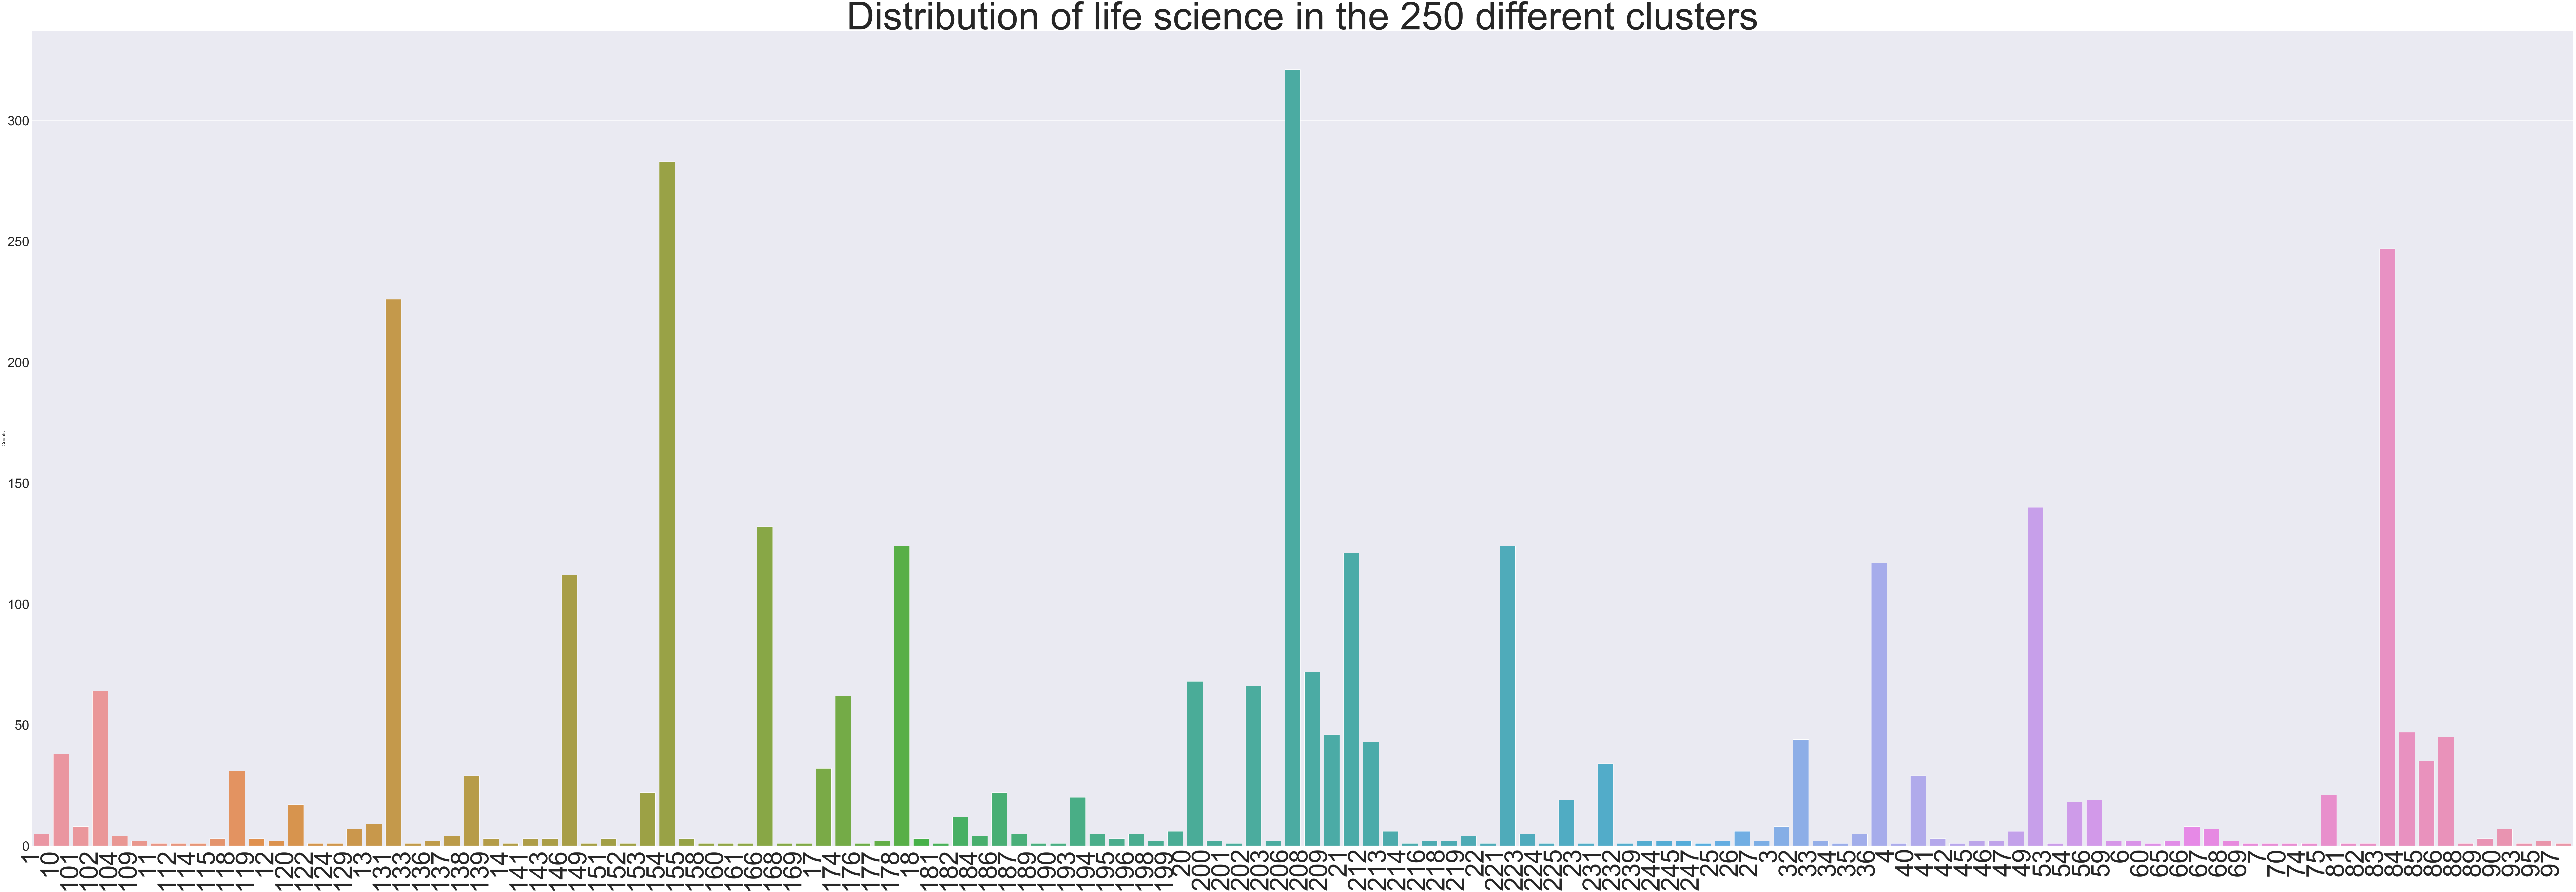

In [117]:
cluster_series = pd.Series(np.array(cluster_count_list)).value_counts().sort_values(ascending=False)
plt.figure(figsize=(150,53))
ax = sns.barplot(cluster_series.index,cluster_series.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=105)
ax.set_title("Distribution of life science in the 250 different clusters",fontsize=160)

ax.set_ylabel("Counts",fontsize=20)
sns.set(font_scale=5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.tight_layout()
#plt.show()
plt.savefig("assets/figures/DistributionClusters")